In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.isna().sum().sum()

0

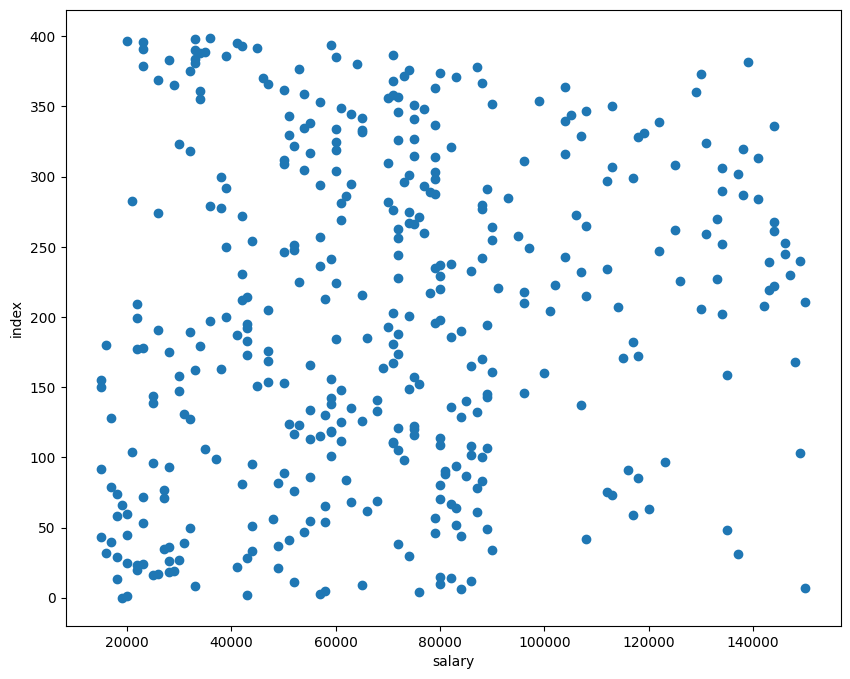

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(df['EstimatedSalary'],df.index)
plt.xlabel('salary')
plt.ylabel('index')
plt.show()

In [8]:
column_to_cluster = ['EstimatedSalary']
selected_data = df[column_to_cluster]
sc = StandardScaler()
scaled_data = sc.fit_transform(selected_data)

In [10]:
krng = range(1,25)

sse = []

for k in krng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    sse.append(km.inertia_)
    

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

In [12]:
sse

[400.0,
 142.57574945485513,
 51.29785089171937,
 28.852131782156626,
 17.23154750485619,
 12.667863752805513,
 8.72855044184315,
 6.983052978753658,
 5.483840740320645,
 4.492682135759982,
 3.6662507092418584,
 2.7916946537549383,
 2.404686673783444,
 2.0567980417511946,
 1.8202567695956842,
 1.7231419553516742,
 1.4160446002111484,
 1.3113172088362306,
 1.1995295827510182,
 1.0399638605104298,
 0.9662216682331123,
 0.8683885554155947,
 0.733426469399849,
 0.6785214471794008]

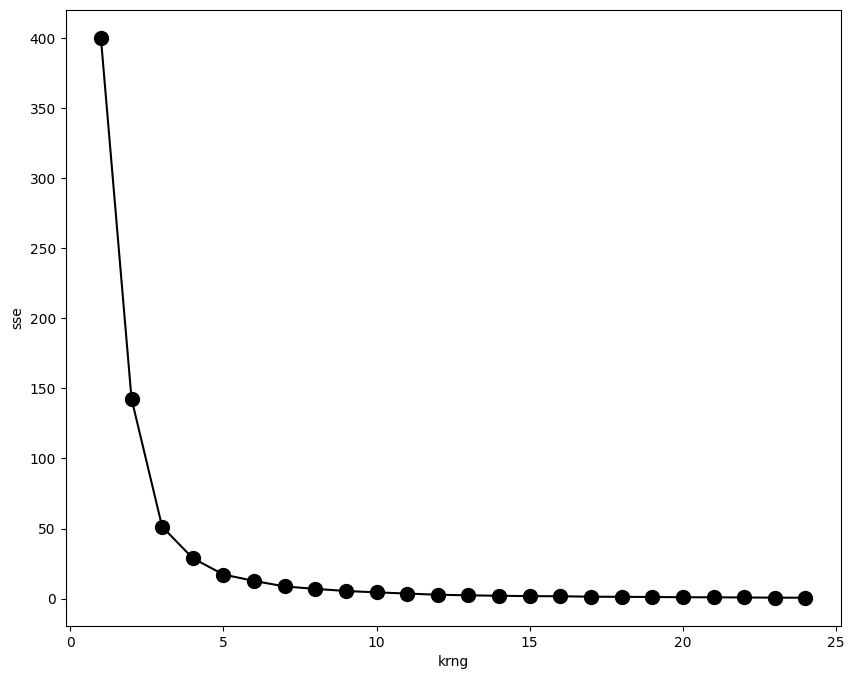

In [14]:
plt.figure(figsize=(10,8))
plt.plot(krng,sse,color='black',markersize=10,marker='o')
plt.xlabel('krng')
plt.ylabel('sse')
plt.show()

In [15]:
km = KMeans(n_clusters=3,random_state=42)
km.fit(scaled_data)
pred = km.predict(scaled_data)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
df['Cluster'] = pred
df['Cluster'].value_counts()

Cluster
1    179
0    148
2     73
Name: count, dtype: int64

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Cluster
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,1


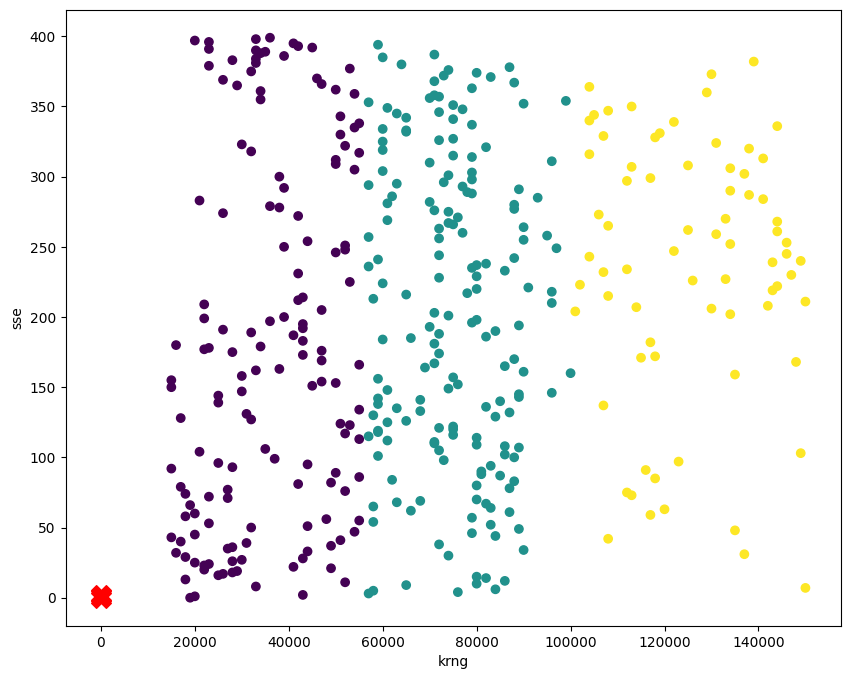

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(df['EstimatedSalary'],df.index,c=df['Cluster'])
plt.xlabel('krng')
plt.ylabel('sse')
plt.show()